# Logistic Regression

__Logistic Regression__ is a binary classifier that is used to predict the probability that a data point belongs to a particular class.

Let ${x_1, ..., x_n} \in X$ be our set of features and ${y_1, y_2} \in Y$ be our set of labels. Since we are using a binary classifier, we can assume without loss of generality that $y_1 = 0$ and $y_2 = 1$. 

First, given an input (a weighted sum of the features plus some bias), it computes the probability that it belongs to a class y as follows:

$$ \hat{y} = \sigma(w^{\top}x) = \frac{1}{1 + e^{-w^{\top}x}}. $$

$ w^{\top}x $ is called the __preactivation__. 

Then, a __logistic__, or an estimated probability, which is denoted by $\hat{p}$ and is computed as follows:

$$ \hat{p} = \{ \hat{y} \ \text{if} \ y = 1, \ 1 - \hat{y} \ \text{if} \ y = 0\}. $$

Then, the prediction is given by: $\hat{y} = \{0 \ \text{if} \ \hat{p} < 0.5, 1 \ \text{otherwise}\}. $

Note that this follows a Bernoulli Distribution. 

### Training the Algorithm:

The algorithm seeks to compute the minimizer of the Cross Entropy Loss (CEL):

$$ \min_{\hat{y}} L(w;x,y) = -y \ log(\hat{y}) - (1-y) \ log(1-\hat{y}).$$

Intuitively, this makes sense - we want the model to predict high probabilities (minimize $\hat{y}$) for the instances where $y = 1$, and low probabilities (maximize $1 - \hat{y}$) for the instances where $y = 0$. 

We find the minimizer using gradient descent, so we compute the gradient of the CEL:

$$ \nabla L(w;x,y) = 
\begin{bmatrix}
(\hat{y} - y) x_1\\
(\hat{y} - y) x_2\\
(\hat{y} - y) \\
\end{bmatrix} $$


---

In this module, we train a logistic regression model to make predictions on artificial data using two different methods:

- Programming the algorithm from scratch. 
- Using the [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) class from Sklearn.

We use the [MakeClassification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification) class from Sklearn to generate the artificial data. 

---

The following packages are required to run the attached code:
- [Pandas](https://pandas.pydata.org/docs/)
- [Numpy](https://numpy.org/doc/stable/reference/)
- [Matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
- [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [366]:
# import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

# The artificial data will be taken from sklearn
from sklearn.datasets import make_classification

In [373]:
# load the data
X,Y = make_classification(n_samples = 100, n_features = 2, n_informative = 2, n_redundant = 0)

# normalize the values
X[:, 0] = X[:, 0]/np.linalg.norm(X[:, 0])
X[:, 1] = X[:, 1]/np.linalg.norm(X[:, 1])

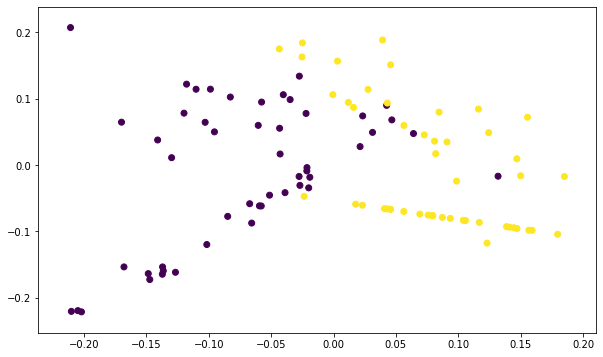

In [376]:
# visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c = Y)

Text(0, 0.5, 'target')

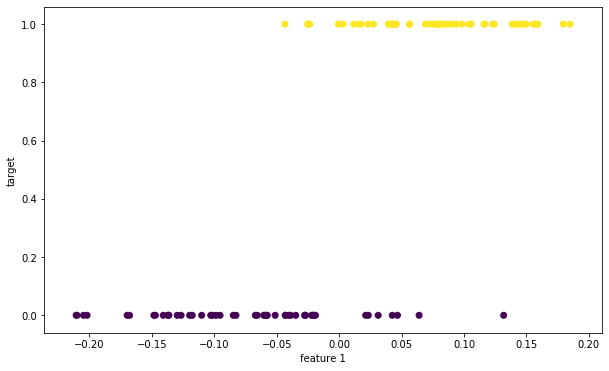

In [408]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], Y, c = Y)
plt.xlabel("feature 1")
plt.ylabel("target")

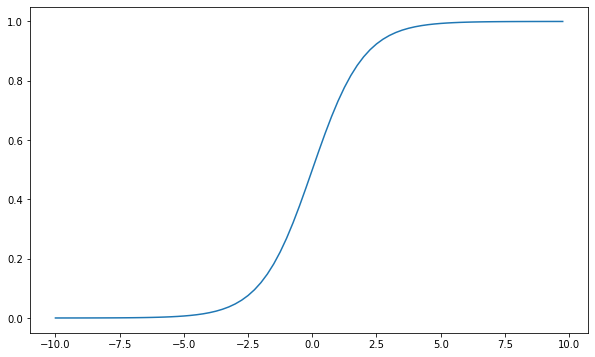

In [378]:
# define the sigmoid function
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

domain = np.arange(-10, 10, .25)
plt.figure(figsize=(10, 6))
plt.plot(domain, sigmoid(domain))

In [398]:
# define y_hat
def feed_forward(x, w, b, with_bias = True):
    if with_bias == True:
        return sigmoid(w @ x + b)

# define cross entropy loss function. we add a term epsilon = 1e-05 in order to avoid division by 0
def cross_entropy_loss(y, y_hat, epsilon):
    return -y*np.log(y_hat + epsilon) - (1.0 - y)*np.log(1.0 - y_hat + epsilon) 

# define gradient of cross entropy loss function
def cross_entropy_gradient(y, y_hat, x, with_bias = True):
    if with_bias == True:
        dw = (y_hat - y)*x
        db = (y_hat - y)
        return dw, db 
    
# initialize the weights (w), bias (b), and learning rate (alpha)
w = np.random.randn(2)
b = np.random.randn()
alpha = 0.9


# Implement Stochastic Gradient Descent 
for j in range(10_000):
    epsilon = 1e-05
    i = np.random.randint(len(Y))
    x = X[i, :]
    y = Y[i]
    temp_dw = []
    temp_db = []
    for x, y in zip(X, Y):
        y_hat = feed_forward(x, w, b)
        dw, db = cross_entropy_gradient(y, y_hat, x)
        #w -= alpha*dw
        #b -= alpha*db
        temp_dw.append(dw)
        temp_db.append(db)
        
    dw = sum(temp_dw)/len(temp_dw)
    db = sum(temp_db)/len(temp_db)
    w -= alpha*dw
    b -= alpha*db
    
    total_loss = sum(cross_entropy_loss(Y[i], feed_forward(x, w, b), epsilon) for i, x in enumerate(X))
    if j % 1_000 == 0:
        print(f"Total Loss at time {j+1} = {total_loss}")

Total Loss at time 1 = 74.81135992363913
Total Loss at time 1001 = 36.40164805405859
Total Loss at time 2001 = 32.525638247895834
Total Loss at time 3001 = 31.21151501737437
Total Loss at time 4001 = 30.604110454756036
Total Loss at time 5001 = 30.280392702487237
Total Loss at time 6001 = 30.09332300252157
Total Loss at time 7001 = 29.979477615499736
Total Loss at time 8001 = 29.907681239006575
Total Loss at time 9001 = 29.86122042510031


--- 

Note that our loss function is working because it decreases with each iteration. Thus, we can begin predicting the labels.

---

In [400]:
# predict the labels
def make_prediction(x, w, b):
    y_hat = feed_forward(x, w, b)
    labels = np.array([1, 0])
    return np.random.choice(labels, p = [y_hat, 1.0-y_hat])

hits = 0
for x, y in zip(X, Y):
    y_hat = make_prediction(x, w, b)
    hits += int(y_hat == y)
    print(f"Prediction: {y_hat}")
    print(f"True label: {y}")
    print()
print(f"Classification Percentage = {100* (hits/len(Y))}%")

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 1
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 1
True label: 1

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 1

Prediction: 1
True label: 1

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 1

Prediction: 1
True label: 1

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 1
True label: 1

Prediction: 1
True label: 1

Prediction: 0


---

We obtain a Classification Percentage of 81.0% by programming the algorithm from scratch. Now, we use the LogisticRegression class from Sklearn to compare the efficacy of our algorithm.

---

In [407]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,Y)
yy = log_reg.predict(X)

hits = 0
for x, y in zip(X, yy):
    y_hat = make_prediction(x, w, b)
    hits += int(y_hat == y)
    print(f"Prediction: {y_hat}")
    print(f"True label: {y}")
    print()
print(f"Classification Percentage = {100* (hits/len(yy))}%")

Prediction: 1
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 1
True label: 1

Prediction: 1
True label: 0

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 1
True label: 0

Prediction: 0
True label: 1

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 1

Prediction: 1
True label: 1

Prediction: 1
True label: 1

Prediction: 1
True label: 1

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 1
True label: 1

Prediction: 1
True label: 1

Prediction: 0


---

The LogisticRegression class from Sklearn attained a Classification Percentage of 84.0%, which is only 3% higher than our algorithm. Thus, our Logistic Regression algorithm is comparable in accuracy to Sklearn's LogisticRegression class.

---